In [57]:
%run methods.ipynb

[nltk_data] Downloading package stopwords to /Users/and/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
#Republicanos Donald Trump
data = clean_data_from_json('../FicherosJSON//P2REPUBLICANS_10000.json',10)
# return [cleanData, df, numeros_list, popularidad_list, len(numero)]
dataClearData = data[0]
dataDf = data[1]

In [25]:
numeros_list = data[2]
popularidad_list = data[3]
numero = data[4]
print(numero)
print(popularidad_list)
print(numeros_list)

10
[0.0, -0.1, 0.13636363636363635, 0.5, 0.0, 0.0, 0.0, 0.13636363636363635, -0.03749999999999999, 0.0]
[ 1  2  3  4  5  6  7  8  9 10]


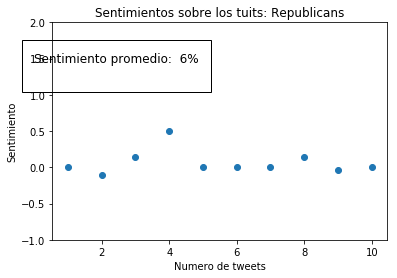

In [26]:
#Dibujar grafica Sentimental
GraficarDatos(numeros_list, popularidad_list, numero, "Sentimientos sobre los tuits: Republicans")


In [59]:
#REALIZAR PARA TODOS
graph = relaciones_network(dataDf)

numNodes = len(graph.node())
numEdges = len(graph.edges())
#list(nx.chain_decomposition(graph))

In [60]:
sentimentGraphNode = updateSentimentNode(graph)
print(sentimentGraphNode.node(data=True))

USAmediatime
twcole56
vandayyt
Paez_T222
alanrothdc
Dhekra
AllieBMason
CarlosRawrrr
mattypowers
woodringgma
FoxNews
RepGutierrez
POTUS
dxguy7
justanavywife
ChelseaClinton
TexasArmyChris
actionjack69
snmrrw
Scaramucci
Resist0917
realDonaldTrump
Carbuccia
ArmenteroDorian
bijou1952
slorider1816
SenSanders
leesa_fl
fatherjonathan
factsnooffense
[('USAmediatime', {'snt': 0.0}), ('twcole56', {'snt': -0.1}), ('vandayyt', {'snt': 0.13636363636363635}), ('Paez_T222', {'snt': 0.5}), ('alanrothdc', {'snt': 0.0}), ('Dhekra', {'snt': 0.0}), ('AllieBMason', {'snt': 0.0}), ('CarlosRawrrr', {'snt': 0.13636363636363635}), ('mattypowers', {'snt': -0.03749999999999999}), ('woodringgma', {'snt': 0.0}), ('FoxNews', {'snt': 0}), ('RepGutierrez', {'snt': 0}), ('POTUS', {'snt': 0}), ('dxguy7', {'snt': 0}), ('justanavywife', {'snt': 0}), ('ChelseaClinton', {'snt': 0}), ('TexasArmyChris', {'snt': 0}), ('actionjack69', {'snt': 0}), ('snmrrw', {'snt': 0}), ('Scaramucci', {'snt': 0}), ('Resist0917', {'snt': 0}), (

In [61]:
nx.write_graphml(sentimentGraphNode, "g.graphml")

In [ ]:
G = nx.path_graph(3)
print(G.nodes(data=True))

pos = nx.spring_layout(G)
print(pos)

    
nx.write_graphml(G, "g.graphml")

In [ ]:
#Republicans
print(numNodes)
print(numEdges)

In [ ]:
#Republicans ASSORTATIVITY
r=nx.degree_assortativity_coefficient(graph)

d=nx.average_neighbor_degree(graph, source='in', target='in')

print(r)
print ('\n')

In [ ]:
#Degree GLOBAL
degreeEachNode=nx.degree(graph)
x = []
for lista, listb in degreeEachNode:
    x.append(listb)
    
#IN-DEGREE
degreeEachNode = nx.in_degree_centrality(graph)
x = degreeEachNode.values()

y = d.values()
plt.loglog(x,y,'.')
plt.xlabel("Grado centralizado de entrada")
plt.show()

#OUT-DEGREE
degreeEachNode = nx.out_degree_centrality(graph)

x = degreeEachNode.values()
y = d.values()

plt.loglog(x,y,'.')
plt.xlabel("Grado centralizado de salida")
plt.show()




In [ ]:
bb = nx.edge_betweenness_centrality(graph, normalized=False)
nx.set_edge_attributes(graph, bb, 'betweenness')


In [ ]:
edges,weights = zip(*nx.get_edge_attributes(graph,'betweenness').items())
pos = nx.spring_layout(graph)
nx.draw(graph, pos, node_color='b', node_size=10 ,edgelist=edges, edge_color=weights, width=2.0, edge_cmap=plt.cm.RdYlGn, with_labels = False)
#nx.write_graphml(graph, "betweenness.graphml", prettyprint=True)

In [ ]:
#Republicans DENSITY
nx.density(graph)

In [ ]:
graph.remove_edges_from(nx.selfloop_edges(graph))
graph = nx.k_core(graph,k=5)

graph = graph.to_undirected()
spring_pos = nx.spring_layout(graph)
edges,weights = zip(*nx.get_edge_attributes(graph,'sentiment').items())

In [ ]:
for node,(x,y) in spring_pos.items():
    graph.node[node]['x'] = float(x)
    graph.node[node]['y'] = float(y)
    

In [ ]:

#pos = nx.spring_layout(graph)
#plt.axis("off")
plt.figure(figsize=(30,30))
spring_pos = nx.spring_layout(graph)
size_node = [val for (node, val) in graph.degree()]
#nx.draw(graph, pos, node_color=sentimentNode, node_size=500 ,edgelist=edges, edge_color='b', width=2.0, edge_cmap=plt.cm.RdYlGn, with_labels = True)
nx.draw_networkx(graph, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color ='r', node_size = size_node, edge_color=weights, edgelist=edges, with_labels = True)
#plt.savefig("graphRepublicsEnlaces.png", dpi=1000)
nx.write_graphml(graph, "semtimentRepublicans.graphml", prettyprint=True)

In [ ]:
#Comunidades 
graph = graph.to_undirected()
c = list(greedy_modularity_communities(graph))

In [ ]:
cadaComunidad = []
numeroDeComunidades = 0
listaDeComunidades = []
dataCadaComunLda=[]
for comunity in c:
    dataParaLDA = []
    sentComunity = [] 
    laComidad = comunity
    for namePerson in laComidad:
        row = df.loc[df['screen_name'] == namePerson]
        tuitLimpio = tweet_clean(row['text'])
        sentComunity.append(sentimentalAnalis(tuitLimpio))
        dataParaLDA.append(tuitLimpio)
    dataCadaComunLda.append(dataParaLDA)
    numeroDeComunidades +=1
    listaDeComunidades.append(numeroDeComunidades)
    cadaComunidad.append(sum(sentComunity)/len(sentComunity))
    
numeroDeComunidades = len(cadaComunidad)
GraficarDatos(listaDeComunidades, cadaComunidad, numeroDeComunidades, "Sentimientos sobre las comunidades en Republics")
    
        

In [ ]:
len(dataCadaComunLda)

In [ ]:
resultData = dict()
varCont = 0
for eachdata in dataCadaComunLda:
    resultData[varCont] = ldaMethod(eachdata, 15)
    varCont +=1
    
